# Workflow example with R2BEAT 
# Scenario 1
Only a sampling frame containing the units of the population 
of reference is available, no previous round of the sampling survey to be 
planned

In [1]:
# Install last version of R2BEAT and ReGenesees
#install.packages("devtools")
#devtools::install_github("DiegoZardetto/ReGenesees",dependencies = FALSE)
#devtools::install_github("barcaroli/R2BEAT")
library(R2BEAT)

Caricamento del pacchetto richiesto: plyr

Caricamento del pacchetto richiesto: devtools

Caricamento del pacchetto richiesto: usethis

Caricamento del pacchetto richiesto: sampling



In [2]:
packageVersion("R2BEAT")

[1] '1.0.4'

In [3]:
## Sampling frame
load("pop.RData")

## Precision constraints

In [4]:

cv <- as.data.frame(list(DOM=c("DOM1","DOM2"),
                         CV1=c(0.02,0.03),
                         CV2=c(0.03,0.06),
                         CV3=c(0.03,0.06),
                         CV4=c(0.05,0.08)))
cv

DOM,CV1,CV2,CV3,CV4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
DOM1,0.02,0.03,0.03,0.05
DOM2,0.03,0.06,0.06,0.08


## Sensitivity analysis


Calculating strata...
Computations are being done on population data

Number of strata:  24
... of which with only one unit:  0
Calculating rho in strata...
Stratum  1000
Stratum  2000
Stratum  3000
Stratum  4000
Stratum  5000
Stratum  6000
Stratum  7000
Stratum  8000
Stratum  9000
Stratum  10000
Stratum  11000
Stratum  12000
Stratum  13000
Stratum  14000
Stratum  15000
Stratum  16000
Stratum  17000
Stratum  18000
Stratum  19000
Stratum  20000
Stratum  21000
Stratum  22000
Stratum  23000
Stratum  24000
 1  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     39     132       171 8077
3          2     42     134       176 8074

 2  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     30     121       151 8130
3          2     32     124       156 8127

 3  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     24     111       135 8188
3         

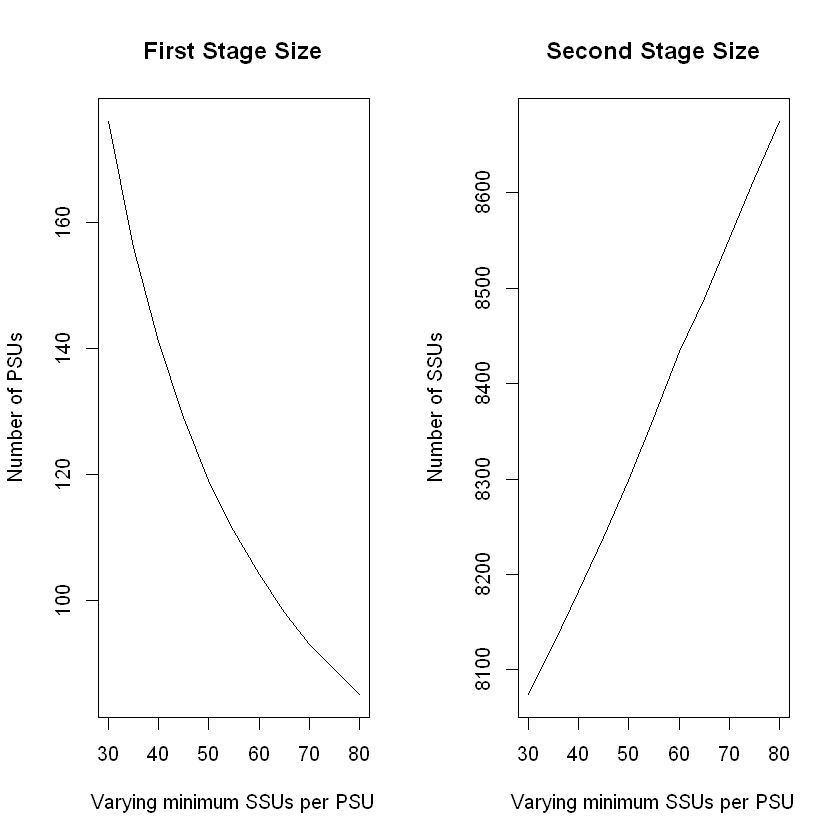

In [5]:
sens_min_SSU <- sensitivity_min_SSU (
             samp_frame=pop,
             errors=cv,
             id_PSU="municipality",
             id_SSU="id_ind",
             strata_var="stratum",
             target_vars=c("income_hh","active","inactive","unemployed"),
             deff_var="stratum",
             domain_var="region",
             delta=1,
             f=0.05,
             deff_sugg=1,
             min=30,
             max=80,
             plot=TRUE)

## Preparation of inputs for allocation steps

In [6]:
## Preparation of inputs for allocation steps
samp_frame <- pop
samp_frame$one <- 1
id_PSU <- "municipality"  
id_SSU <- "id_ind"        
strata_var <- "stratum"   
target_vars <- c("income_hh","active","inactive","unemployed")   
deff_var <- "stratum"     
domain_var <- "region"  
delta =  1       # households = survey units
minimum <- 50    # minimum number of SSUs to be interviewed in each selected PSU
f = 0.05         # suggestion for the sampling fraction 
deff_sugg <- 1.5 # suggestion for the deff value
 
inp <- prepareInputToAllocation1(samp_frame,
                                id_PSU,
                                id_SSU,
                                strata_var,
                                target_vars,
                                deff_var,
                                domain_var,
                                minimum,
                                delta,
                                f,
                                deff_sugg)


Calculating strata...
Computations are being done on population data

Number of strata:  24
... of which with only one unit:  0
Calculating rho in strata...
Stratum  1000
Stratum  2000
Stratum  3000
Stratum  4000
Stratum  5000
Stratum  6000
Stratum  7000
Stratum  8000
Stratum  9000
Stratum  10000
Stratum  11000
Stratum  12000
Stratum  13000
Stratum  14000
Stratum  15000
Stratum  16000
Stratum  17000
Stratum  18000
Stratum  19000
Stratum  20000
Stratum  21000
Stratum  22000
Stratum  23000
Stratum  24000

In [7]:
head(inp$strata)

,N,M1,M2,M3,M4,S1,S2,S3,S4,COST,CENS,DOM1,DOM2,STRATUM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1000,197007,23959.87,0.6650322,0.2285807,0.10638708,22179.08,0.4719792,0.4199185,0.3083324,1,0,1,2,1000
2000,261456,20966.65,0.6709886,0.2297519,0.09925953,19624.65,0.4698541,0.4206732,0.2990102,1,0,1,2,2000
3000,115813,19814.73,0.6644591,0.2315975,0.10394343,14754.88,0.4721792,0.4218532,0.3051871,1,0,1,2,3000
4000,17241,18732.72,0.6273418,0.2499275,0.12273070,13462.74,0.4835122,0.4329708,0.3281278,1,0,1,2,4000
5000,101067,22070.31,0.6134445,0.2338845,0.15267100,17187.98,0.4869603,0.4232996,0.3596701,1,0,1,2,5000
6000,47218,21069.07,0.6135796,0.2348469,0.15157355,17342.74,0.4869288,0.4239031,0.3586070,1,0,1,2,6000


In [8]:
head(inp$deff)

,STRATUM,DEFF1,DEFF2,DEFF3,DEFF4,b_nar
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1.5,1.5,1.5,1.5,4925.17500
12,2000,1.5,1.5,1.5,1.5,1005.60000
18,3000,1.5,1.5,1.5,1.5,222.71731
19,4000,1.5,1.5,1.5,1.5,47.89167
20,5000,1.5,1.5,1.5,1.5,2526.67500
21,6000,1.5,1.5,1.5,1.5,786.96667


In [9]:
head(inp$effst)

,STRATUM,EFFST1,EFFST2,EFFST3,EFFST4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,1,1,1
2,2000,1,1,1,1
3,3000,1,1,1,1
4,4000,1,1,1,1
5,5000,1,1,1,1
6,6000,1,1,1,1


In [10]:
head(inp$rho)

,STRATUM,RHO_AR1,RHO_NAR1,RHO_AR2,RHO_NAR2,RHO_AR3,RHO_NAR3,RHO_AR4,RHO_NAR4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,0.0032494875,1,0.00001260175649,1,0.0000003631192,1,0.000039120880
2,2000,1,0.0028554017,1,0.00150936389450,1,0.0007420929883,1,0.000937018761
3,3000,1,0.0069678726,1,0.00162968276279,1,0.0006469515878,1,0.002837431259
4,4000,1,0.0114552934,1,0.00578473329221,1,0.0019797687826,1,0.008962657055
5,5000,1,0.0002677333,1,0.00000001682475,1,0.0000029484212,1,0.000003404961
6,6000,1,0.0057050500,1,0.00004270905958,1,0.0000397945795,1,0.000194411580


In [11]:
head(inp$psu_file)

,PSU_ID,STRATUM,PSU_MOS
,<dbl>,<fct>,<dbl>
1,1,12000,1546
2,2,12000,936
3,3,12000,367
4,4,10000,13032
5,5,12000,678
6,6,11000,3193


In [12]:
head(inp$des_file)

,STRATUM,STRAT_MOS,DELTA,MINIMUM
,<fct>,<dbl>,<dbl>,<dbl>
1,1000,197007,1,50
2,2000,261456,1,50
3,3000,115813,1,50
4,4000,17241,1,50
5,5000,101067,1,50
6,6000,47218,1,50


## Allocation

In [13]:
alloc <- beat.2st(stratif = inp$strata, 
                  errors = cv, 
                  des_file = inp$des_file, 
                  psu_file = inp$psu_file, 
                  rho = inp$rho, 
                  deft_start = NULL, 
                  effst = inp$effst,
                  epsilon1 = 5, 
                  mmdiff_deft = 1,
                  maxi = 15, 
                  epsilon = 10^(-11), 
                  minnumstrat = 2, 
                  maxiter = 200, 
                  maxiter1 = 25)

  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     20      93       113 8304
3          2     23      96       119 8299


In [14]:
allocat <- alloc$alloc[-nrow(alloc$alloc),]
set.seed(1234)
sample_2st <- StratSel(dataPop= inp$psu_file,
                       idpsu= ~ PSU_ID, 
                       dom= ~ STRATUM, 
                       final_pop= ~ PSU_MOS, 
                       size= ~ PSU_MOS, 
                       PSUsamplestratum= 1, 
                       min_sample= minimum, 
                       min_sample_index= FALSE, 
                       dataAll=allocat,
                       domAll= ~ factor(STRATUM), 
                       f_sample= ~ ALLOC, 
                       planned_min_sample= NULL, 
                       launch= F)

In [15]:
sample_2st[[2]]

Domain,SRdom,nSRdom,SRdom+nSRdom,SR_PSU_final_sample_unit,NSR_PSU_final_sample_unit
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1000,2,0,2,287,0
2000,3,4,7,143,233
3000,0,4,4,0,177
4000,0,1,1,0,32
5000,2,0,2,172,0
6000,1,1,2,32,49
7000,0,1,1,0,53
8000,0,1,1,0,51
9000,1,0,1,558,0


In [ ]:
## Plot of allocation (PSUs and SSUs)
des <- sample_2st[[2]]
des2 <- NULL
des2$strata <- c(des$Domain[1:24],des$Domain[1:24])
des2$SR <- c(rep("SR",24),rep("nSR",24))
des2$PSU <- as.numeric(c(des$SRdom[1:24],des$nSRdom[1:24]))
des2$SSU <- as.numeric(c(des$SR_PSU_final_sample_unit[1:24],des$NSR_PSU_final_sample_unit[1:24]))
des2 <- as.data.frame(des2)
des2$strata <- as.numeric(des2$strata)
par(mfrow=c(2, 1))
barplot(PSU~SR+strata, data=des2,
        main = "PSUs by strata",
        xlab = "strata", ylab = "PSUs",
        col = c("black", "grey"),
        # beside = TRUE,
        las=2,
        cex.names=0.7)
legend("topright", 
       legend = c("Non Self Representative","Self Representative"),cex = 0.7,
       fill = c("black", "grey"))
barplot(SSU~SR+strata, data=des2,
        main = "SSUs by strata",
        xlab = "strata", ylab = "PSUs",
        col = c("black", "grey"),
        # beside = TRUE,
        las=2,
        cex.names=0.7)
legend("topright", 
       legend = c("Non Self Representative","Self Representative"),cex = 0.7,
       fill = c("black", "grey"))


## Selection of SSUs (II stage)

In [17]:
selected_PSU <- sample_2st[[4]]
selected_PSU <- selected_PSU[selected_PSU$PSU_final_sample_unit > 0,]
samp <- select_SSU(df=pop,
                   PSU_code="municipality",
                   SSU_code="id_ind",
                   PSU_sampled=selected_PSU[selected_PSU$Sampled_PSU==1,],
                   verbose=TRUE)



PSU =  1  *** Selected SSU =  46
PSU =  2  *** Selected SSU =  72
PSU =  3  *** Selected SSU =  52
PSU =  4  *** Selected SSU =  558
PSU =  5  *** Selected SSU =  105
PSU =  6  *** Selected SSU =  54
PSU =  7  *** Selected SSU =  79
PSU =  8  *** Selected SSU =  38
PSU =  9  *** Selected SSU =  52
PSU =  10  *** Selected SSU =  56
PSU =  11  *** Selected SSU =  51
PSU =  12  *** Selected SSU =  50
PSU =  13  *** Selected SSU =  50
PSU =  14  *** Selected SSU =  46
PSU =  15  *** Selected SSU =  50
PSU =  16  *** Selected SSU =  87
PSU =  17  *** Selected SSU =  58
PSU =  18  *** Selected SSU =  51
PSU =  19  *** Selected SSU =  187
PSU =  20  *** Selected SSU =  54
PSU =  21  *** Selected SSU =  45
PSU =  22  *** Selected SSU =  58
PSU =  23  *** Selected SSU =  53
PSU =  24  *** Selected SSU =  45
PSU =  25  *** Selected SSU =  38
PSU =  26  *** Selected SSU =  47
PSU =  27  *** Selected SSU =  51
PSU =  28  *** Selected SSU =  68
PSU =  29  *** Selected SSU =  58
PSU =  30  *** Sele

In [18]:
nrow(samp)
sum(allocat$ALLOC)

[1] 8294

[1] 8299

In [19]:
nrow(pop)
sum(samp$weight)

[1] 2258507

[1] 2258507

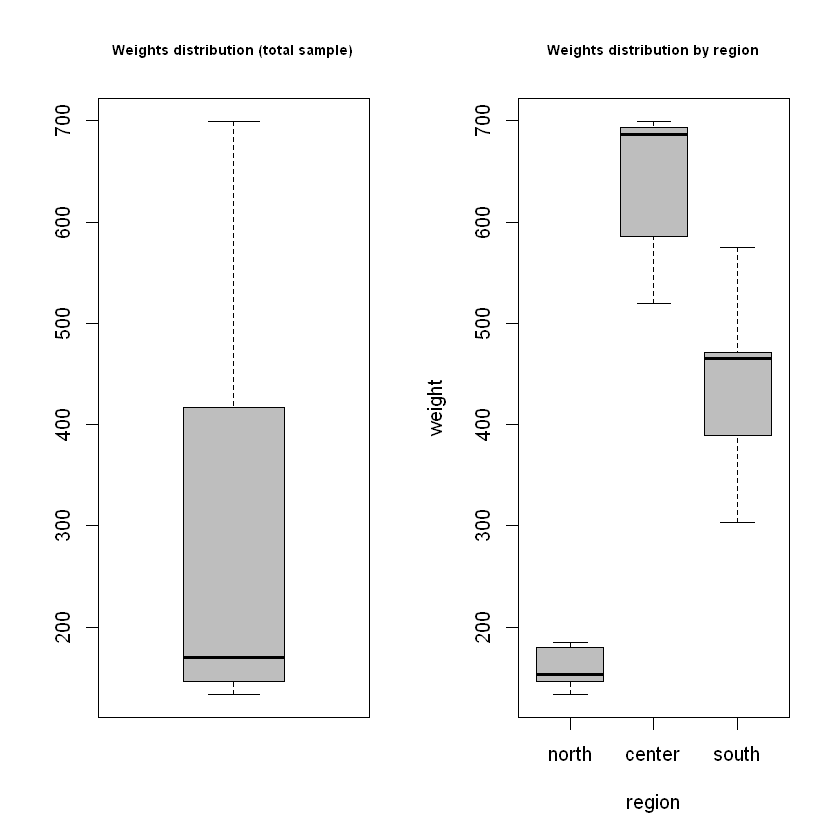

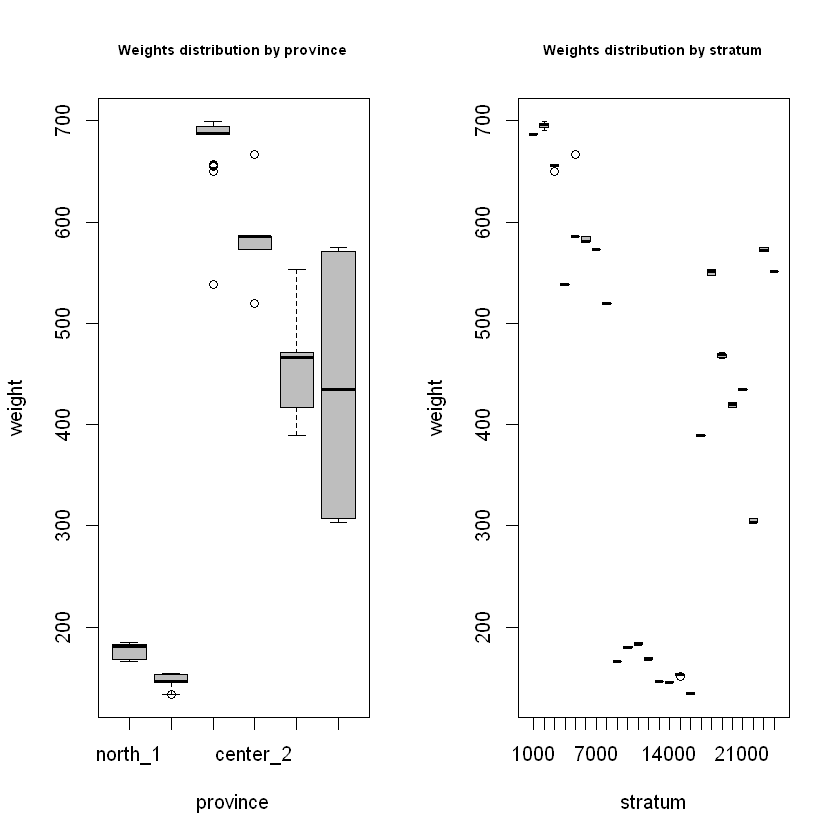

In [20]:
## Plot of weights distribution
par(mfrow=c(1, 2))
boxplot(samp$weight,col="grey")
title("Weights distribution (total sample)",cex.main=0.7)
boxplot(weight ~ region, data=samp,col="grey")
title("Weights distribution by region",cex.main=0.7)
par(mfrow=c(1, 2))
boxplot(weight ~ province, data=samp,col="grey")
title("Weights distribution by province",cex.main=0.7)
boxplot(weight ~ stratum, data=samp,col="grey")
title("Weights distribution by stratum",cex.main=0.7)

## Precision constraints compliance control (by simulation)

In [21]:
selected_PSU <- sample_2st[[4]]
df=pop
df$one <- 1
PSU_code="municipality"
SSU_code="id_ind"
PSU_sampled=selected_PSU[selected_PSU$Sampled_PSU==1,]
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")  
PSU_sampled <- selected_PSU[selected_PSU$PSU_final_sample_unit > 0,]

In [22]:
# Domain level = national
domain_var <- "one"
eval <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    PSU_sampled,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval$coeff_var

  |======================================================================| 100%


CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0112,0.0096,0.0274,0.0357,DOM1


In [ ]:
# Domain level = regional
domain_var <- "region"
set.seed(1234)
eval <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    PSU_sampled,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval$coeff_var

  |=============================================================         |  87%

In [ ]:
alloc$sensitivity

In [ ]:
save(samp,file="sample.RData")